### Závěrečný projekt - modul Python

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně.
Projekt se dělí na 2 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` získejte všechny aktuální inzerce bytů v daném městě. 
- Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (Ulice+město)`
2. Datová analýza - ETL proces
- V první fázi prověďte processing dat tak, aby obsahovala příslušné datové typy, nenulové hodnoty atp. Ulice i město bude v samostatných sloupcích.
- Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
3. Datová analýza - analýza dat
- Třetí část začněte tak, že si do dataframe nahrajete vámi vyexportovaný `.csv` soubor s vyscrapovanými daty.
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou kompozici?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`


Dotazy zodpovězte ve vašem pracovním notebooku a výsledný soubor nahrajte na GitHub.


### WebScraping

In [274]:
def ziskej_cenu_bytu(text: str) -> tuple[str, int]:
    cena = text.split()[2]
    metry = text.split()[3]

    return cena, metry

from bs4 import BeautifulSoup
import requests

strana = 1
byty_data = []

while True:
    data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/zlin?strana={strana}').text
    soup = BeautifulSoup(data, 'html.parser')
    
    byty = soup.findAll('li', 'MuiGrid-root MuiGrid-item css-l1328q')
    
    for byt in byty:
        odkaz = byt.find('a', 'MuiTypography-root MuiTypography-inherit MuiLink-root MuiLink-underlineAlways css-1c7vz4z')['href']
        info_byty = byt.find('div', 'MuiBox-root css-n6y9a7')
        if info_byty is None:
            continue
        byt_detail = info_byty.find('p',  'MuiTypography-root MuiTypography-body1 css-13ztabn').text
    
        rozmery, kompozice = ziskej_cenu_bytu(byt_detail)
        ulice_kompozice = info_byty.findAll('p', 'MuiTypography-root MuiTypography-body1 css-13ztabn')
        ulice = ulice_kompozice[1].text
        cena = info_byty.find('p', 'MuiTypography-root MuiTypography-body1 css-1ndcg2e').text
        print(cena)
        byt_objekt = {
            'Cena': cena,
            'Kompozice bytu': kompozice,
            'Rozměry bytu': rozmery,
            'Lokace': ulice
        }
    
        byty_data.append(byt_objekt)
        
    button = soup.find('button', 'MuiButtonBase-root MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit css-lp5ywq').text
        
    if button != 'Další stránka':
        print('Již zde není žádná další strana. Končím')
        break        
            
    strana += 1
        
    print(f'Scrapuju stránku č. {strana}')


22 000 Kč/měsíc
12 000 Kč/měsíc
9 000 Kč/měsíc
3 800 Kč/měsíc
18 000 Kč/měsíc
11 500 Kč/měsíc
8 300 Kč/měsíc
Cena na vyžádání
18 700 Kč/měsíc
14 900 Kč/měsíc
16 000 Kč/měsíc
25 000 Kč/měsíc
Cena na vyžádání
17 000 Kč/měsíc
10 000 Kč/měsíc
14 000 Kč/měsíc
10 000 Kč/měsíc
16 000 Kč/měsíc
15 900 Kč/měsíc
18 000 Kč/měsíc
15 000 Kč/měsíc
Scrapuju stránku č. 2
13 500 Kč/měsíc
15 500 Kč/měsíc
20 690 Kč/měsíc
14 900 Kč/měsíc
17 500 Kč/měsíc
15 800 Kč/měsíc
Cena na vyžádání
14 000 Kč/měsíc
10 400 Kč/měsíc
9 000 Kč/měsíc
12 000 Kč/měsíc
18 500 Kč/měsíc
16 500 Kč/měsíc
9 500 Kč/měsíc
12 000 Kč/měsíc
9 000 Kč/měsíc
18 500 Kč/měsíc
12 800 Kč/měsíc
12 000 Kč/měsíc
13 500 Kč/měsíc
12 000 Kč/měsíc
Scrapuju stránku č. 3
22 000 Kč/měsíc
17 500 Kč/měsíc
10 000 Kč/měsíc
16 500 Kč/měsíc
13 000 Kč/měsíc
9 000 Kč/měsíc
11 500 Kč/měsíc
9 600 Kč/měsíc
7 500 Kč/měsíc
10 500 Kč/měsíc
12 000 Kč/měsíc
12 900 Kč/měsíc
19 000 Kč/měsíc
13 500 Kč/měsíc
17 900 Kč/měsíc
17 200 Kč/měsíc
4 300 Kč/měsíc
9 900 Kč/měsíc
8 50

In [275]:
df.to_csv('Velcovsky_zdrojová_data.csv', index=False, encoding='utf-8')

### Datová analýza

In [276]:
import pandas as pd
df = pd.read_csv('Velcovsky_zdrojová_data.csv')

In [277]:
df['Čistá cena'] = (
    df['Cena'].str.replace(r'\D', '', regex=True)  # Odstranění všech nečíselných znaků
    .replace('', None)  # Nahrazení prázdných hodnot hodnotou None
    .dropna()  # Odstranění prázdných řádků
    .astype(int)  # Převod na číslo
)
# Odstranil jsem řádky, kde je prázdná hodnota. V případě nabídky pronájmu se jedná o "Cena na vyžádání".

df = df.dropna(subset=['Čistá cena'])

# Výstup
print(df)



     Unnamed: 0             Cena  Kompozice bytu Rozměry bytu  \
0             0  19 000 Kč/měsíc              73          3+1   
1             1   8 300 Kč/měsíc              26         1+kk   
2             3  18 700 Kč/měsíc              65         2+kk   
3             4  12 000 Kč/měsíc              56          2+1   
4             5   9 000 Kč/měsíc              25          1+1   
..          ...              ...             ...          ...   
141         148  18 000 Kč/měsíc              49         2+kk   
142         149  19 000 Kč/měsíc              79          4+1   
143         150  39 900 Kč/měsíc             100         4+kk   
144         151   9 000 Kč/měsíc              40         2+kk   
145         152  14 900 Kč/měsíc              47         2+kk   

                           Lokace  Čistá cena  
0                   Slezská, Zlín       19000  
1     Tečovská, Zlín - Malenovice        8300  
2                 Lorencova, Zlín       18700  
3                    Dlouhá

In [278]:
#Jaká je průměrná cena bytů nabízených bytů

prumerna_cena = df['Čistá cena'].mean().round(2)
print(f'Průměrná cena pronájmu v lokalitě Zlín je {prumerna_cena} Kč')

Průměrná cena pronájmu v lokalitě Zlín je 14272.52 Kč


In [279]:
df['Rozměry bytu'].unique()

array(['3+1', '1+kk', '2+kk', '2+1', '1+1', '3+kk', 'atypický', 'pokoje',
       '4+1', '4+kk'], dtype=object)

Rozměry bytu
1+1         10228.57
1+kk        11059.09
2+1         13346.55
2+kk        17051.90
3+1         16450.00
3+kk        19125.00
4+1         20000.00
4+kk        39900.00
atypický     9750.00
pokoje       6889.78
Name: Čistá cena, dtype: float64


Text(0, 0.5, 'Cena pronájmu v Kč')

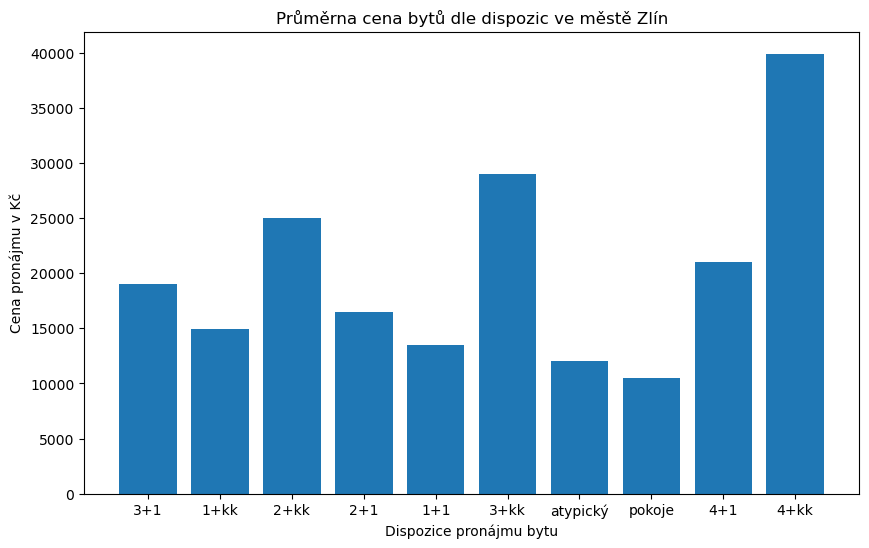

In [280]:
# Seskupení podle 'Rozměr bytu' a výpočet průměrné ceny
prumerna_cena = df.groupby('Rozměry bytu')['Čistá cena'].mean().round(2)
print(prumerna_cena)

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df['Rozměry bytu'], df['Čistá cena'])
plt.title('Průměrna cena bytů dle dispozic ve městě Zlín')
plt.xlabel('Dispozice pronájmu bytu')
plt.ylabel('Cena pronájmu v Kč')

In [281]:
df.head()

,Unnamed: 0,Cena,Kompozice bytu,Rozměry bytu,Lokace,Čistá cena
0,0,19 000 Kč/měsíc,73,3+1,"Slezská, Zlín",19000
1,1,8 300 Kč/měsíc,26,1+kk,"Tečovská, Zlín - Malenovice",8300
2,3,18 700 Kč/měsíc,65,2+kk,"Lorencova, Zlín",18700
3,4,12 000 Kč/měsíc,56,2+1,"Dlouhá, Zlín",12000
4,5,9 000 Kč/měsíc,25,1+1,"Vysoká, Zlín",9000


In [282]:
#Existuje ulice, kde je vyšší koncentrace dražších bytů?
ulice = df.groupby('Lokace')['Čistá cena'].agg(['max','count'])
ulice.describe()

,max,count
count,87.000000,87.000000
mean,15285.977011,1.678161
std,4999.362857,1.271277
min,6500.000000,1.000000
25%,12000.000000,1.000000
50%,14650.000000,1.000000
75%,17900.000000,2.000000
max,39900.000000,9.000000


In [283]:
#Existuje ulice, kde je vyšší koncentrace dražších bytů?

# Zde jsem provedl seskupení podle 'Lokace' a výpočet agregovaných hodnot
lokace_statistiky = df.groupby('Lokace')['Čistá cena'].agg(['mean', 'count', 'max']).round(2)

# Seřadil jsem podle průměrné ceny (od nejdražší)
lokace_statistiky = lokace_statistiky.sort_values(by='mean', ascending=False)

# Výpis lokalit s více než 2 byty a průměrnou cenou nad 20 000 Kč
drazsi_lokace = lokace_statistiky[(lokace_statistiky['mean'] > 20000) & (lokace_statistiky['count'] > 2)]

print(f'Ulice s nejvyšší koncentrací dražších bytů, dle zadaných parametrů více než 2 byty a průměrnou cenou nad 20 000 Kč je lokalita:')
drazsi_lokace


Ulice s nejvyšší koncentrací dražších bytů, dle zadaných parametrů více než 2 byty a průměrnou cenou nad 20 000 Kč je lokalita:


,mean,count,max
Lokace,,,
Luhačovice,20877.78,9,39900


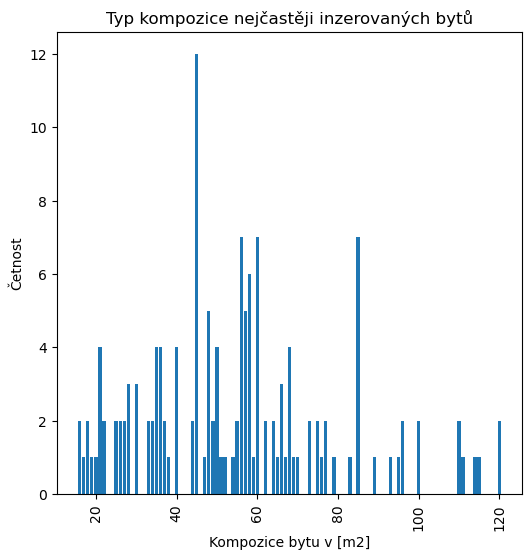

Kompozice bytu
45    12
60     7
85     7
56     7
58     6
Name: count, dtype: int64

In [284]:
#Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?

kompo = df['Kompozice bytu'].value_counts()
plt.figure(figsize=(6, 6))
plt.bar(kompo.index, kompo.values)
plt.title('Typ kompozice nejčastěji inzerovaných bytů')
plt.xlabel('Kompozice bytu v [m2]')
plt.ylabel('Četnost')
plt.xticks(rotation=90)
plt.show()
kompo.head(5)

#Největší počet nabízených bytů je s rozlohou 45m2 (celkem 12 inzerovaných). Pravděpodobnou příčinou může být převis nabídky malometrážních bytů, které nejsou prioritní poptávkou rodin s dětmi.
#Alternativně může být vyšší poptávka po menších bytech od mladých lidí nebo jednotlivců.


In [285]:
#Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?

# Provedu filtraci bytů s cenou vyšší než 20 000 Kč
byty_nad_20000 = df[df['Čistá cena'] > 20000]

# Zjištění, zda existují byty s dispozicemi 2+1 nebo 2+kk v této cenové hladině
dva_pokoje = byty_nad_20000[byty_nad_20000['Rozměry bytu'].isin(['2+1', '2+kk'])]

dva_pokoje

,Unnamed: 0,Cena,Kompozice bytu,Rozměry bytu,Lokace,Čistá cena
7,8,25 000 Kč/měsíc,96,2+kk,"Lešetín I, Zlín",25000
18,20,20 690 Kč/měsíc,64,2+kk,"třída Svobody, Zlín - Malenovice",20690
19,21,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000
36,42,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000
57,63,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000
99,105,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000
113,119,25 000 Kč/měsíc,111,2+kk,"Smetanova, Zlín",25000
128,134,22 000 Kč/měsíc,85,2+kk,Luhačovice,22000
136,142,23 000 Kč/měsíc,120,2+kk,"Nádražní, Luhačovice",23000


In [286]:
#Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?
min_max_inzerce = df.groupby('Rozměry bytu')['Čistá cena'].agg(['min','max'])
min_max_inzerce = min_max_inzerce.sort_values(['max'])

rozptyl = min_max_inzerce.assign(rozptyl=lambda x: x['max'] - x['min'])
rozptyl


,min,max,rozptyl
Rozměry bytu,,,
pokoje,3708,10500,6792
atypický,7500,12000,4500
1+1,4200,13500,9300
1+kk,6500,14900,8400
2+1,9000,16500,7500
3+1,11900,19000,7100
4+1,19000,21000,2000
2+kk,9000,25000,16000
3+kk,13000,29000,16000


In [287]:
#Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?
# Seskupení podle 'Rozměry bytu' a výpočet minimální, maximální ceny a rozptylu
kompozice_stat = (
    df.groupby('Rozměry bytu')['Čistá cena']
    .agg(['min', 'max'])  # Výpočet minimální a maximální ceny
    .assign(rozptyl=lambda x: x['max'] - x['min'])  # Přidání sloupce pro rozptyl
)


nejvetsi_rozptyl = kompozice_stat[kompozice_stat['rozptyl'] == kompozice_stat['rozptyl'].max()]




print("\nKompozice s největším rozptylem:")
print(nejvetsi_rozptyl)




Kompozice s největším rozptylem:
                min    max  rozptyl
Rozměry bytu                       
2+kk           9000  25000    16000
3+kk          13000  29000    16000
